In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

plt.rcParams['figure.dpi'] = 150
import glob, os

Loading BokehJS ...

# Virus Intact Database

42,154 pairwise interactions from <a href="https://www.ebi.ac.uk/legacy-intact/query/annot:%22dataset:virus%22?conversationContext=7" target="\blank">here</a>.

In [2]:
virus_human = pd.read_csv("Data/virus_human.csv")
human_human = pd.read_csv("Data/human_important_for_virus.csv")

In [3]:
genes = pd.read_csv("Data/human_genes.txt", sep="\t", header=None).iloc[:, 0].values
genes_all = pd.read_csv("Data/human_genes_all.txt", sep="\t", header=None).iloc[:, 0].values

In [4]:
len(genes), len(genes_all), len(virus_human), len(human_human)

(7482, 21340, 27024, 8788)

In [6]:
virus_human

,Protein A,Protein B,Method,Publication,Taxid A,Taxid B,Interaction type,Source DB,Interaction identifier,Confidence,Protein A DB,Protein B DB,Taxname A,Taxname B
0,K9N643,O00505,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0914""(association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641017|imex:IM-28059-1,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
1,K9N643,O00629,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0914""(association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641017|imex:IM-28059-1,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
2,K9N643,O00629,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641042|imex:IM-28059-5,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
3,K9N643,O00629,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641070|imex:IM-28059-7,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
4,P52294,K9N643,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,9606,1263720,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641246|imex:IM-28059-15,intact-miscore:0.56,uniprotkb,uniprotkb,Homo sapiens,Betacoronavirus England 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27019,P04608,Q99733,"psi-mi:""MI:0096""(pull down)","imex:IM-17346|pubmed:22190034|psi-mi:""MI:0007""",11706,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-6179622|imex:IM-17346-161,intact-miscore:0.56,uniprotkb,uniprotkb,HIV-1 M:B_HXB2R,Homo sapiens
27020,P04608,O75607,"psi-mi:""MI:0096""(pull down)","imex:IM-17346|pubmed:22190034|psi-mi:""MI:0007""",11706,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-6179635|imex:IM-17346-162,intact-miscore:0.50,uniprotkb,uniprotkb,HIV-1 M:B_HXB2R,Homo sapiens
27021,P04608,O15355,"psi-mi:""MI:0096""(pull down)","imex:IM-17346|pubmed:22190034|psi-mi:""MI:0007""",11706,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-6179648|imex:IM-17346-163,intact-miscore:0.56,uniprotkb,uniprotkb,HIV-1 M:B_HXB2R,Homo sapiens
27022,P04608,O43865,"psi-mi:""MI:0096""(pull down)","imex:IM-17346|pubmed:22190034|psi-mi:""MI:0007""",11706,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-6179661|imex:IM-17346-164,intact-miscore:0.56,uniprotkb,uniprotkb,HIV-1 M:B_HXB2R,Homo sapiens


In [6]:
pwd

'/Users/skulkarni/Desktop/git/bst281_finalProject'

# Results from GOrilla

In [7]:
# all significant at alpha = 0.05 even after FDR
go_function = pd.read_csv("Analysis/GO_genes_function.tsv", sep="\t")
go_process = pd.read_csv("Analysis/GO_genes_process.tsv", sep="\t")

In [666]:
go_process.shape

(1692, 10)

In [668]:
go_process.Description.values

array(['cellular metabolic process', 'metabolic process',
       'macromolecule metabolic process', ...,
       'ribosomal subunit export from nucleus',
       'positive regulation of type I interferon-mediated signaling pathway',
       'positive regulation of double-strand break repair via homologous recombination'],
      dtype=object)

In [13]:
virus_human.head()

,Protein A,Protein B,Method,Publication,Taxid A,Taxid B,Interaction type,Source DB,Interaction identifier,Confidence,Protein A DB,Protein B DB,Taxname A,Taxname B
0,K9N643,O00505,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0914""(association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641017|imex:IM-28059-1,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
1,K9N643,O00629,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0914""(association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641017|imex:IM-28059-1,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
2,K9N643,O00629,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641042|imex:IM-28059-5,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
3,K9N643,O00629,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,1263720,9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641070|imex:IM-28059-7,intact-miscore:0.62,uniprotkb,uniprotkb,Betacoronavirus England 1,Homo sapiens
4,P52294,K9N643,"psi-mi:""MI:0007""(anti tag coimmunoprecipitation)",pubmed:29370303|imex:IM-28059,9606,1263720,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0469""(IntAct)",intact:EBI-25641246|imex:IM-28059-15,intact-miscore:0.56,uniprotkb,uniprotkb,Homo sapiens,Betacoronavirus England 1


In [70]:
def get_gene_lists(df, ref_gene_set):
    
    genes = df["Genes"].values
    
    genes_cleaned = []
    
    # nested list
    for lst in genes:
        
        genes_list = lst.strip("[]").split(", ")
            
        single_go_list = []
        
        for word in genes_list:
            
            # if the first character is an uppercase letter, then it's a gene name
            if not word[0].isdigit() and word[0].upper() == word[0]:
                
                # make sure that every gene is in the list of original genes, otherwise it's not actually a gene
                # this is because of deprecated gene names. GOrilla uses some old names 
                # don't keep the description of the gene that comes after the hyphen
                if word.split("  -")[0] in ref_gene_set:
                    
                    single_go_list.append(word.split("  -")[0])
        
        genes_cleaned.append(single_go_list)
    
    return genes_cleaned

In [82]:
# Takes several seconds to a minute to run
# process_cleaned_genes = get_gene_lists(go_process, genes)
# go_process["Genes"] = process_cleaned_genes

# function_cleaned_genes = get_gene_lists(go_function, genes)
# go_function["Genes"] = function_cleaned_genes

# go_process["Number of Genes"] = [len(lst) for lst in go_process["Genes"]]
# go_function["Number of Genes"] = [len(lst) for lst in go_function["Genes"]]

go_process = go_process.sort_values("Number of Genes", ascending=False).reset_index(drop=True)
go_function = go_function.sort_values("Number of Genes", ascending=False).reset_index(drop=True)

In [83]:
go_function

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes,Number of Genes
0,GO:0003674,molecular_function,8.100000e-72,3.420000e-69,1.04,18195,17011,7080,6893,"[ARAP1, A2M, AGAP3, SERPINA3, CATSPER1, AADAC,...",6809
1,GO:0005488,binding,1.170000e-141,1.820000e-138,1.10,18195,15326,7080,6545,"[ARAP1, A2M, AGAP3, SERPINA3, CATSPER1, AADAC,...",6466
2,GO:0005515,protein binding,8.570000e-204,3.980000e-200,1.17,18195,13126,7080,5981,"[ARAP1, AFG3L2, POP1, A2M, MSL3, AGAP3, CATSPE...",5906
3,GO:0097159,organic cyclic compound binding,5.970000e-116,4.630000e-113,1.32,18195,5674,7080,2909,"[AFG3L2, POP1, BMP2K, MSL3, EXOSC10, AGAP3, ZC...",2880
4,GO:1901363,heterocyclic compound binding,3.460000e-116,3.220000e-113,1.32,18195,5594,7080,2876,"[AFG3L2, POP1, BMP2K, MSL3, EXOSC10, AGAP3, PM...",2847
...,...,...,...,...,...,...,...,...,...,...,...
262,GO:0072542,protein phosphatase activator activity,2.380000e-04,5.030000e-03,2.36,18195,12,7080,11,"[PHACTR4, PPP2R5C, PPP2R5B, PPP2R5A, CALM2, B3...",11
263,GO:0000774,adenyl-nucleotide exchange factor activity,2.380000e-04,5.050000e-03,2.36,18195,12,7080,11,"[GRPEL1, BAG5, PFN1, BAG3, BAG4, BAG1, BAG2, H...",11
264,GO:0005068,transmembrane receptor protein tyrosine kinase...,9.980000e-04,1.740000e-02,2.17,18195,13,7080,11,"[SH2B3, TRADD, GAB2, SHC1, STAP1, IRS1, SH2B1,...",11
265,GO:0017166,vinculin binding,5.640000e-04,1.060000e-02,2.34,18195,11,7080,10,"[DMD, TLN1, SORBS3, ACTN1, CTNNA1, CORO2B, PXN...",10


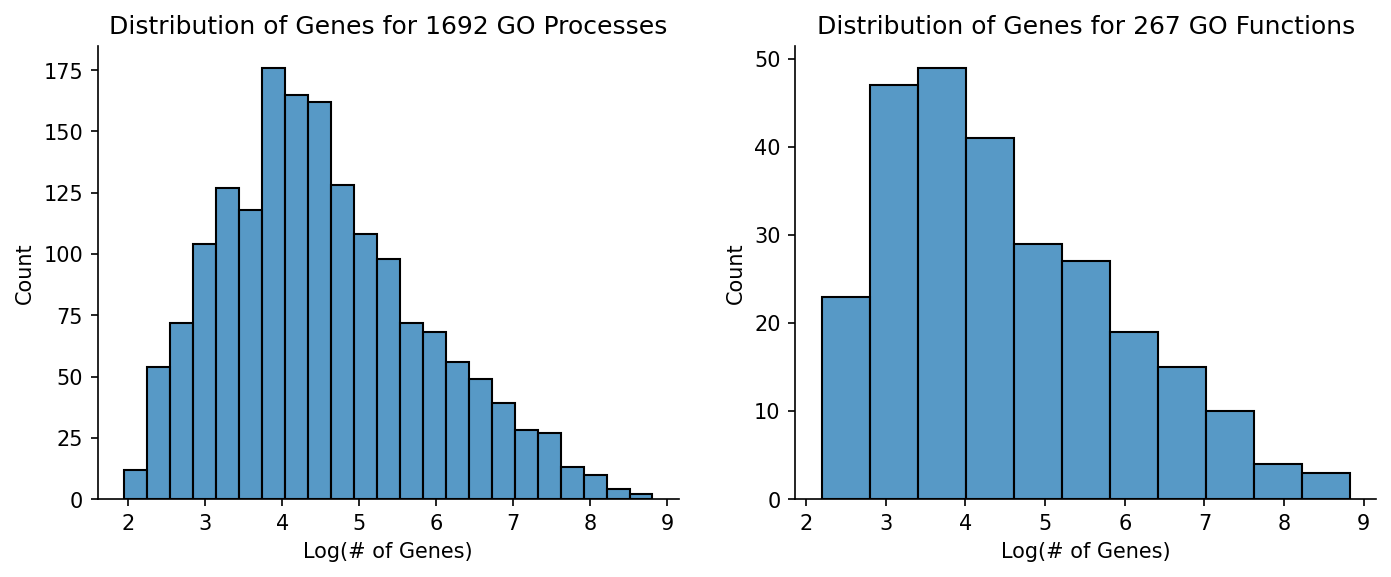

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

sns.histplot(np.log(go_process["Number of Genes"]), ax=ax[0])
ax[0].set_title(f"Distribution of Genes for {len(go_process)} GO Processes")
ax[0].set_xlabel("Log(# of Genes)")

sns.histplot(np.log(go_function["Number of Genes"]), ax=ax[1])
ax[1].set_title(f"Distribution of Genes for {len(go_function)} GO Functions")
ax[1].set_xlabel("Log(# of Genes)")

sns.despine()
plt.show()

# Functional Enrichment

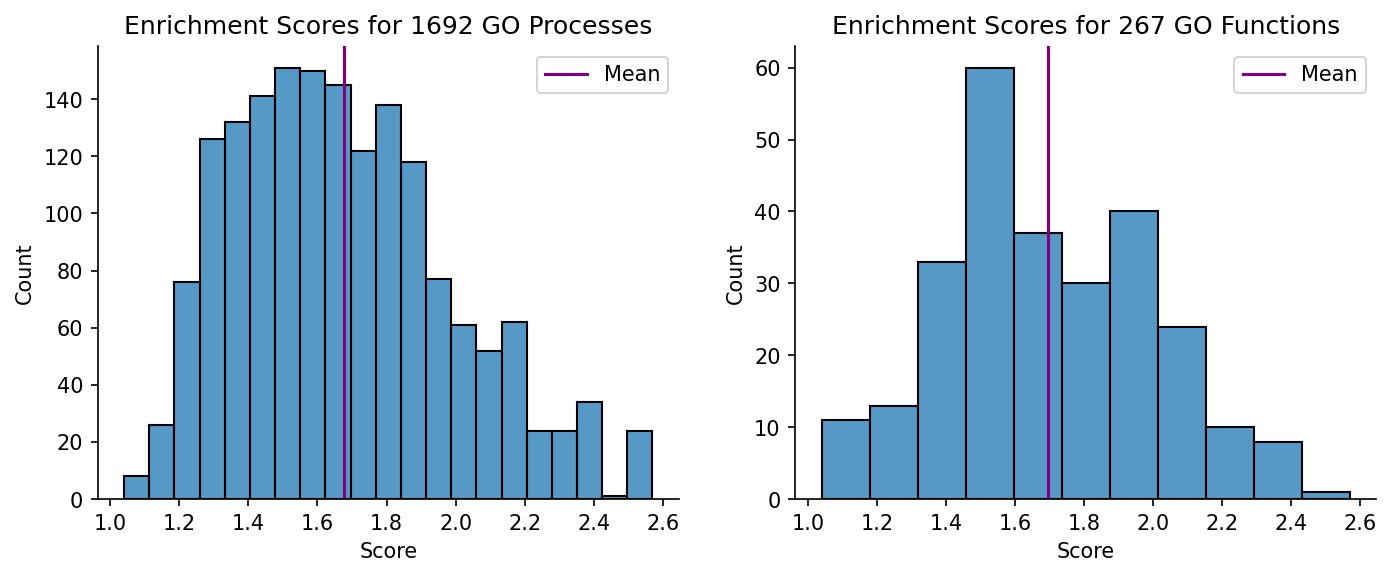

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

sns.histplot(go_process["Enrichment"], ax=ax[0])
ax[0].axvline(x=np.mean(go_process["Enrichment"]), color="purple", label="Mean")
ax[0].set_title(f"Enrichment Scores for {len(go_process)} GO Processes")
ax[0].set_xlabel("Score")
ax[0].legend()

sns.histplot(go_function["Enrichment"], ax=ax[1])
ax[1].axvline(x=np.mean(go_function["Enrichment"]), color="purple", label="Mean")
ax[1].set_title(f"Enrichment Scores for {len(go_function)} GO Functions")
ax[1].set_xlabel("Score")
ax[1].legend()

sns.despine()
plt.show()

## Functions will be more interesting to look at because they are broader, i.e. RNA binding, ubiquitin stuff, etc.

### Good portion here for discussion because 

In [140]:
function_high = go_function.loc[go_function["Enrichment"] > np.mean(go_function["Enrichment"])]

# largest q-value post FDR is significant at alpha = 0.05

print(function_high["FDR q-value"].max())
function_high

0.0174


,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes,Number of Genes
16,GO:0003723,RNA binding,1.680000e-178,3.900000e-175,1.87,18195,1582,7080,1149,"[POP1, EXOSC10, ZNF239, ZCCHC8, RNPC3, SF3A3, ...",1138
52,GO:0050839,cell adhesion molecule binding,1.720000e-39,2.580000e-37,1.75,18195,485,7080,330,"[HSPA1A, MAPRE1, DST, EMP2, PRDX6, EMD, SPTAN1...",325
58,GO:0045296,cadherin binding,3.220000e-43,5.550000e-41,1.98,18195,312,7080,240,"[HSPA1A, MAPRE1, PRDX6, EMD, SPTAN1, MARK2, CT...",236
61,GO:0044389,ubiquitin-like protein ligase binding,1.110000e-39,1.720000e-37,1.95,18195,305,7080,231,"[TRIB3, HSPA1A, HSPA1B, PRDX6, DNAJA1, BRCA1, ...",229
64,GO:0031625,ubiquitin protein ligase binding,2.810000e-39,4.090000e-37,1.97,18195,287,7080,220,"[TRIB3, HSPA1A, HSPA1B, PRDX6, DNAJA1, BRCA1, ...",218
...,...,...,...,...,...,...,...,...,...,...,...
262,GO:0072542,protein phosphatase activator activity,2.380000e-04,5.030000e-03,2.36,18195,12,7080,11,"[PHACTR4, PPP2R5C, PPP2R5B, PPP2R5A, CALM2, B3...",11
263,GO:0000774,adenyl-nucleotide exchange factor activity,2.380000e-04,5.050000e-03,2.36,18195,12,7080,11,"[GRPEL1, BAG5, PFN1, BAG3, BAG4, BAG1, BAG2, H...",11
264,GO:0005068,transmembrane receptor protein tyrosine kinase...,9.980000e-04,1.740000e-02,2.17,18195,13,7080,11,"[SH2B3, TRADD, GAB2, SHC1, STAP1, IRS1, SH2B1,...",11
265,GO:0017166,vinculin binding,5.640000e-04,1.060000e-02,2.34,18195,11,7080,10,"[DMD, TLN1, SORBS3, ACTN1, CTNNA1, CORO2B, PXN...",10


In [160]:
# flatten the array of lists of genes and take the unique ones
function_high_genes = np.unique([gene for genes_list in function_high.Genes for gene in genes_list])
print(f"{len(function_high_genes)} genes in the enriched GO functions")

# make a dictionary for easy searching of genes associated with individual GO terms
function_high_dict = dict(zip(function_high["GO Term"], function_high["Genes"]))

2820 genes in the enriched GO functions


In [166]:
def go_terms_for_gene(go_dict, gene):
    
    go_res = []

    for key in go_dict.keys():
        if gene in go_dict[key]:
            go_res.append(key)
            
    return go_res

In [189]:
# cool, this runs in under a second. I was expecting it to take forever
function_high_GO = [go_terms_for_gene(function_high_dict, gene) for gene in function_high_genes]
assert len(function_high_GO) == len(function_high_genes)

function_high_GO_dict = dict(zip(function_high_genes, function_high_GO))

In [190]:
function_high_GO_dict

{'A1CF': ['GO:0003723', 'GO:0003729', 'GO:0003727'],
 'A2M': ['GO:0002020'],
 'A2ML1': ['GO:0002020'],
 'AARS2': ['GO:0003723', 'GO:0004812', 'GO:0016875'],
 'AATF': ['GO:0003723', 'GO:0048156'],
 'ABCA1': ['GO:0031267', 'GO:0008565'],
 'ABCB1': ['GO:0044389', 'GO:0031625'],
 'ABCC4': ['GO:0015662'],
 'ABCD1': ['GO:0043531'],
 'ABCE1': ['GO:0043021', 'GO:0043024'],
 'ABCF1': ['GO:0003723', 'GO:0008135'],
 'ABCF3': ['GO:0050839', 'GO:0045296'],
 'ABI1': ['GO:0050839', 'GO:0045296', 'GO:0060090', 'GO:0035591'],
 'ABI2': ['GO:0044389',
  'GO:0031625',
  'GO:0060090',
  'GO:0031267',
  'GO:0030674',
  'GO:0035591',
  'GO:0070064'],
 'ABL1': ['GO:0008022',
  'GO:0004713',
  'GO:0051219',
  'GO:0045309',
  'GO:0004715',
  'GO:0001784',
  'GO:0005080',
  'GO:0046875',
  'GO:0070064'],
 'ABL2': ['GO:0004713',
  'GO:0051219',
  'GO:0045309',
  'GO:0004715',
  'GO:0001784'],
 'ABT1': ['GO:0003723'],
 'ABTB1': ['GO:0003723', 'GO:0008135', 'GO:0003746'],
 'ACD': ['GO:0070182'],
 'ACIN1': ['GO:0003

## Make a matrix of 2820 by 120 --> 2820 for the genes, 120 for the GO terms. One-hot encoded

I think this is the most efficient way to store this information

In [176]:
len(function_high)

120

In [177]:
len(function_high_genes)

2820

In [180]:
genes_GO_high_matrix = np.zeros(shape=(len(function_high_genes), len(function_high)))

# use alphabetical order --> in the order of function_high_genes x np.sort(function_high["GO Term"])

In [181]:
genes_GO_high_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(len(function_high_genes)):
    
    

In [188]:
function_high_GO

[['GO:0003723', 'GO:0003729', 'GO:0003727'],
 ['GO:0002020'],
 ['GO:0002020'],
 ['GO:0003723', 'GO:0004812', 'GO:0016875'],
 ['GO:0003723', 'GO:0048156'],
 ['GO:0031267', 'GO:0008565'],
 ['GO:0044389', 'GO:0031625'],
 ['GO:0015662'],
 ['GO:0043531'],
 ['GO:0043021', 'GO:0043024'],
 ['GO:0003723', 'GO:0008135'],
 ['GO:0050839', 'GO:0045296'],
 ['GO:0050839', 'GO:0045296', 'GO:0060090', 'GO:0035591'],
 ['GO:0044389',
  'GO:0031625',
  'GO:0060090',
  'GO:0031267',
  'GO:0030674',
  'GO:0035591',
  'GO:0070064'],
 ['GO:0008022',
  'GO:0004713',
  'GO:0051219',
  'GO:0045309',
  'GO:0004715',
  'GO:0001784',
  'GO:0005080',
  'GO:0046875',
  'GO:0070064'],
 ['GO:0004713', 'GO:0051219', 'GO:0045309', 'GO:0004715', 'GO:0001784'],
 ['GO:0003723'],
 ['GO:0003723', 'GO:0008135', 'GO:0003746'],
 ['GO:0070182'],
 ['GO:0003723'],
 ['GO:0003723', 'GO:0003729', 'GO:0051539'],
 ['GO:0051539'],
 ['GO:0047485'],
 ['GO:0043531'],
 ['GO:0048156', 'GO:0019894'],
 ['GO:0044389', 'GO:0031625'],
 ['GO:000372

In [185]:
np.sort(function_high["GO Term"])

array(['GO:0000774', 'GO:0000993', 'GO:0001046', 'GO:0001047',
       'GO:0001091', 'GO:0001098', 'GO:0001099', 'GO:0001224',
       'GO:0001671', 'GO:0001784', 'GO:0002020', 'GO:0002039',
       'GO:0003678', 'GO:0003684', 'GO:0003688', 'GO:0003697',
       'GO:0003723', 'GO:0003724', 'GO:0003725', 'GO:0003727',
       'GO:0003729', 'GO:0003735', 'GO:0003743', 'GO:0003746',
       'GO:0004386', 'GO:0004697', 'GO:0004698', 'GO:0004709',
       'GO:0004712', 'GO:0004713', 'GO:0004715', 'GO:0004812',
       'GO:0005048', 'GO:0005068', 'GO:0005080', 'GO:0005158',
       'GO:0005484', 'GO:0005547', 'GO:0008022', 'GO:0008094',
       'GO:0008135', 'GO:0008139', 'GO:0008143', 'GO:0008565',
       'GO:0009931', 'GO:0015662', 'GO:0016504', 'GO:0016875',
       'GO:0016891', 'GO:0017056', 'GO:0017069', 'GO:0017070',
       'GO:0017166', 'GO:0019789', 'GO:0019843', 'GO:0019894',
       'GO:0019903', 'GO:0030159', 'GO:0030235', 'GO:0030374',
       'GO:0030515', 'GO:0030674', 'GO:0030971', 'GO:00

In [175]:
function_high_GO

[['GO:0003723', 'GO:0003729', 'GO:0003727'],
 ['GO:0002020'],
 ['GO:0002020'],
 ['GO:0003723', 'GO:0004812', 'GO:0016875'],
 ['GO:0003723', 'GO:0048156'],
 ['GO:0031267', 'GO:0008565'],
 ['GO:0044389', 'GO:0031625'],
 ['GO:0015662'],
 ['GO:0043531'],
 ['GO:0043021', 'GO:0043024'],
 ['GO:0003723', 'GO:0008135'],
 ['GO:0050839', 'GO:0045296'],
 ['GO:0050839', 'GO:0045296', 'GO:0060090', 'GO:0035591'],
 ['GO:0044389',
  'GO:0031625',
  'GO:0060090',
  'GO:0031267',
  'GO:0030674',
  'GO:0035591',
  'GO:0070064'],
 ['GO:0008022',
  'GO:0004713',
  'GO:0051219',
  'GO:0045309',
  'GO:0004715',
  'GO:0001784',
  'GO:0005080',
  'GO:0046875',
  'GO:0070064'],
 ['GO:0004713', 'GO:0051219', 'GO:0045309', 'GO:0004715', 'GO:0001784'],
 ['GO:0003723'],
 ['GO:0003723', 'GO:0008135', 'GO:0003746'],
 ['GO:0070182'],
 ['GO:0003723'],
 ['GO:0003723', 'GO:0003729', 'GO:0051539'],
 ['GO:0051539'],
 ['GO:0047485'],
 ['GO:0043531'],
 ['GO:0048156', 'GO:0019894'],
 ['GO:0044389', 'GO:0031625'],
 ['GO:000372